#Prediction Model Project

##Using Decision Trees

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target  # Target variable

# Step 1: Feature scaling (for better decision boundaries visualization)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[iris.feature_names]), columns=iris.feature_names)
df_scaled['target'] = df['target']

# Step 2: Split the dataset into training (80%) and testing (20%)
X = df_scaled[iris.feature_names]  # Features
y = df_scaled['target']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Function to predict species based on input features
def predict_iris_species(sepal_length, sepal_width, petal_length, petal_width):
    input_features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    input_scaled = scaler.transform(input_features)  # Scale the input
    predicted_class = model.predict(input_scaled)
    return iris.target_names[predicted_class][0]

# Example prediction
sepal_length_input = 5.0
sepal_width_input = 3.5
petal_length_input = 1.4
petal_width_input = 0.2

predicted_species = predict_iris_species(sepal_length_input, sepal_width_input, petal_length_input, petal_width_input)
print(f"Predicted Iris Species: {predicted_species}")


Accuracy: 1.00
Predicted Iris Species: setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


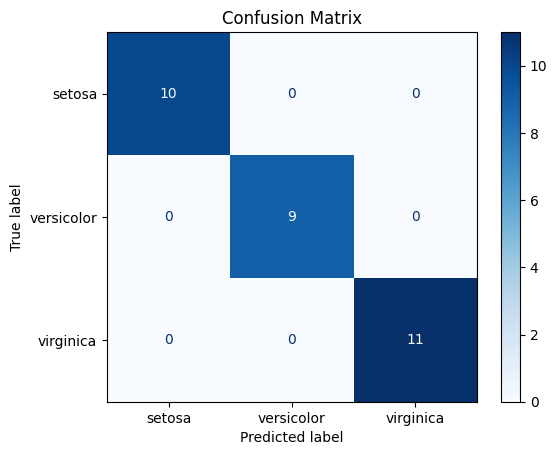

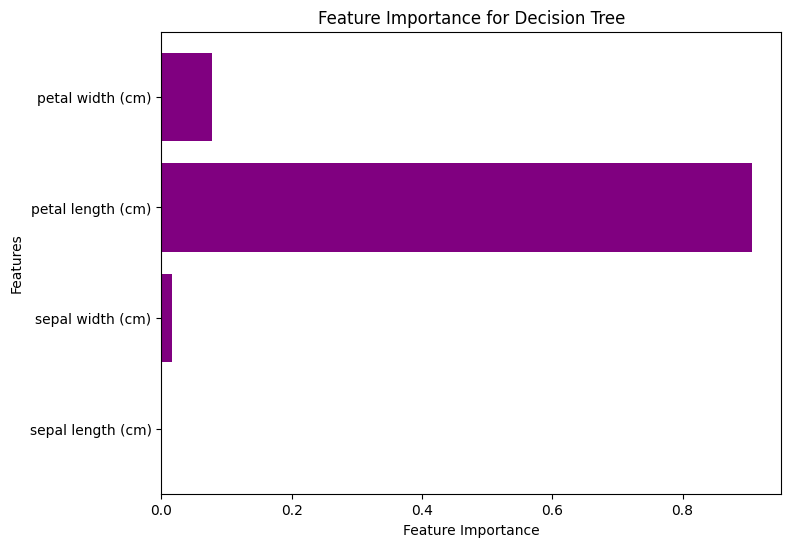

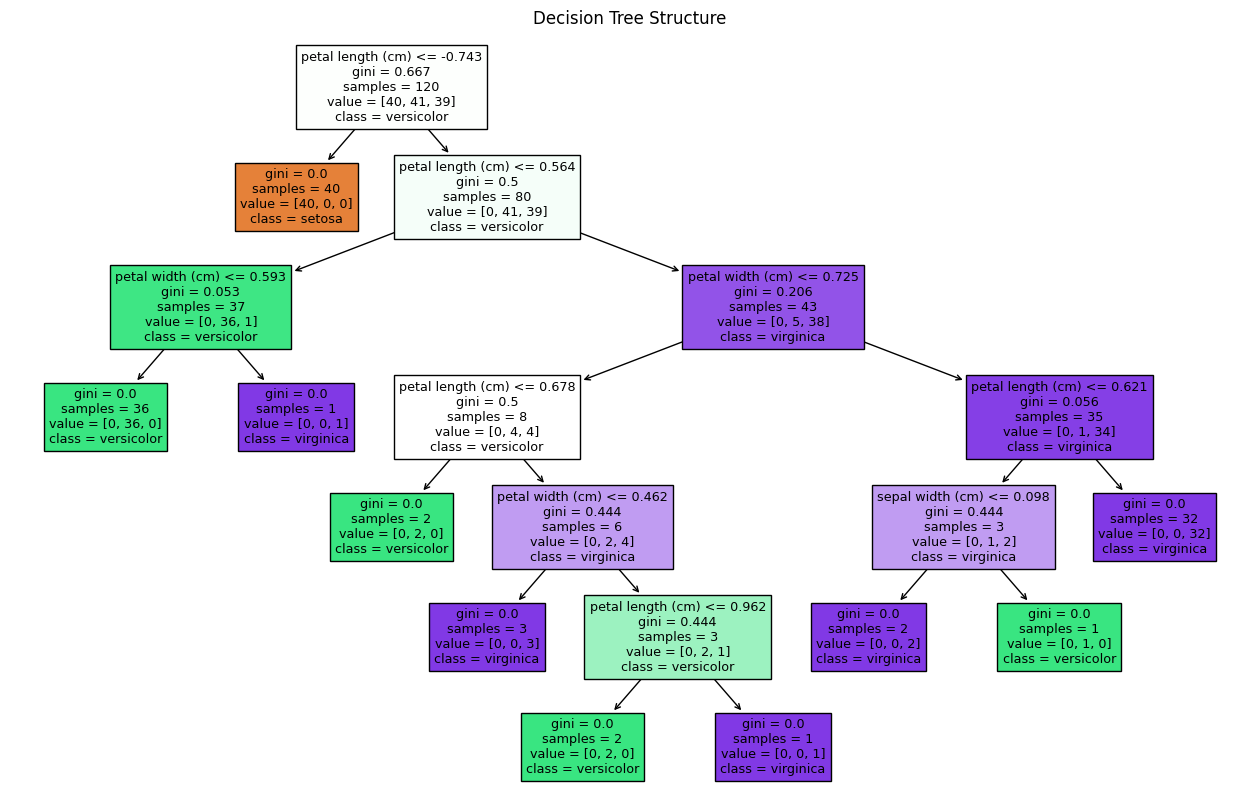

In [ ]:
# Step 6: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Step 7: Feature Importance
feature_importance = model.feature_importances_

# Visualize feature importance
plt.figure(figsize=(8, 6))
plt.barh(iris.feature_names, feature_importance, color='purple')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Decision Tree')
plt.show()

# Step 8: Visualize the Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Structure")
plt.show()


In [ ]:
# Example prediction
sepal_length_input = float(input("Enter Sepal Legnth(in cms): "))
sepal_width_input = float(input("Enter Sepal Width(in cms): "))
petal_length_input = float(input("Enter Petal Legnth(in cms): "))
petal_width_input = float(input("Enter Petal Width(in cms): "))

predicted_species = predict_iris_species(sepal_length_input, sepal_width_input, petal_length_input, petal_width_input)
print(f"Predicted Iris Species: {predicted_species}")

Enter Sepal Legnth(in cms): 2.1
Enter Sepal Width(in cms): 3.4
Enter Petal Legnth(in cms): 2.0
Enter Petal Width(in cms): 1.9
Predicted Iris Species: setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


##Linear Regression and California Housing Dataset


Missing Values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
HouseSize     0
dtype: int64
Mean Squared Error: 0.80


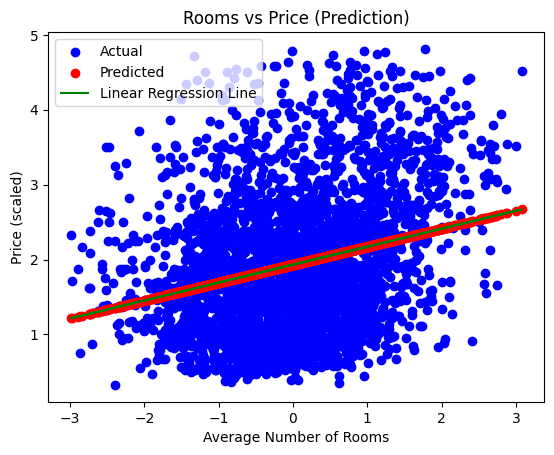

Predicted House Price: 2.30 (scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target  # Target variable (house price)

# Compute House Size (in square feet) by assuming each room is approximately 200 square feet
df['HouseSize'] = df['AveRooms'] * 200  # Simplified estimate for house size

# Step 1: Check for missing values (this dataset doesn't have any, but let's include the code for general practice)
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# If missing values exist, fill them with the mean of each column
df.fillna(df.mean(), inplace=True)

# Step 2: Handle outliers using the Interquartile Range (IQR) method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers (anything outside 1.5*IQR from Q1 and Q3)
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 3: Feature Scaling
scaler = StandardScaler()

# Scale the feature columns, including the new HouseSize feature
df_scaled = pd.DataFrame(scaler.fit_transform(df[['AveRooms', 'HouseSize']]), columns=['AveRooms', 'HouseSize'])

# Add the target column back to the scaled DataFrame
df_scaled['PRICE'] = df['PRICE'].reset_index(drop=True)

# Let's predict house price based on average number of rooms and house size
X = df_scaled[['AveRooms', 'HouseSize']]  # Features: Rooms and House Size
y = df_scaled['PRICE']  # Target: Price

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error for evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Scatter plot to visualize the actual vs predicted prices
plt.scatter(X_test['AveRooms'], y_test, color='blue', label='Actual')
plt.scatter(X_test['AveRooms'], y_pred, color='red', label='Predicted')

# Plotting the linear regression line
plt.plot(X_test['AveRooms'], y_pred, color='green', label='Linear Regression Line')

plt.xlabel('Average Number of Rooms')
plt.ylabel('Price (scaled)')
plt.title('Rooms vs Price (Prediction)')
plt.legend()
plt.show()

# Function to predict house price based on user input for average number of rooms and house size
def predict_house_price(average_rooms_input, house_size_input):
    # Scale the inputs before making predictions
    input_scaled = scaler.transform([[average_rooms_input, house_size_input]])

    # Predict house price
    predicted_price = model.predict(input_scaled)

    return predicted_price[0]

# Example prediction
average_rooms_input = 6  # Example: Enter the average number of rooms
house_size_input = 1500  # Example: Enter the house size in square feet
predicted_price = predict_house_price(average_rooms_input, house_size_input)

print(f"Predicted House Price: {predicted_price:.2f} (scaled)")


Mean Squared Error: 0.80
R-squared: 0.08


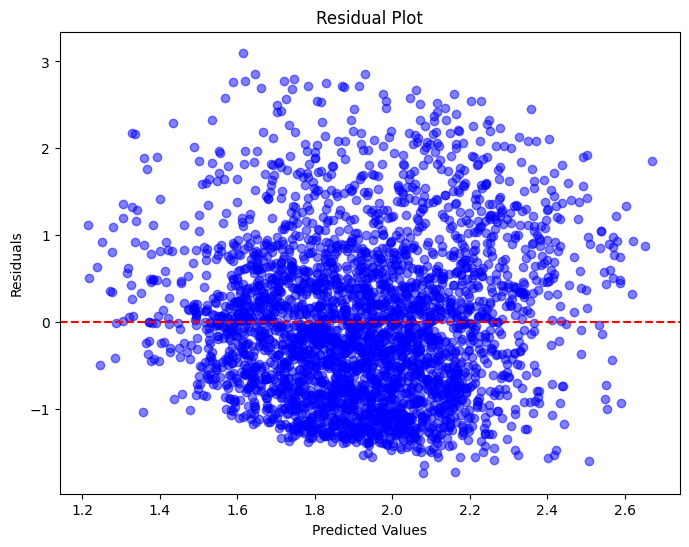

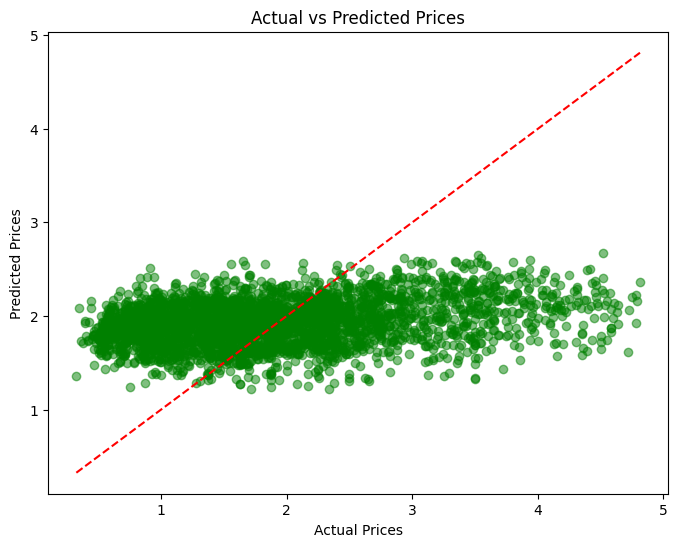

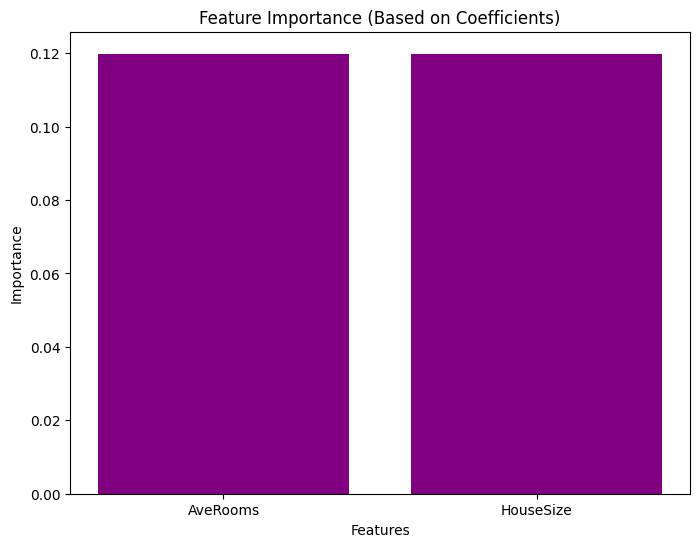

In [ ]:
# Calculate the Mean Squared Error and R² for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# 1. Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# 2. Scatter Plot of Actual vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal Line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# 3. Feature Importance (Coefficients)
feature_importance = abs(model.coef_)

plt.figure(figsize=(8, 6))
plt.bar(['AveRooms', 'HouseSize'], feature_importance, color='purple')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (Based on Coefficients)')
plt.show()

In [ ]:
# Example prediction
average_rooms_input = int(input("Enter the average number of rooms"))
house_size_input =int(input("Enter the house size in square feet"))
predicted_price = predict_house_price(average_rooms_input, house_size_input)

print(f"Predicted House Price: {predicted_price:.2f} (scaled)")

Enter the average number of rooms6
Enter the house size in square feet3000
Predicted House Price: 3.16 (scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
